In [1]:
import pandas as pd

In [2]:
#read data set
df = pd.read_excel('communities.xlsx', header=None)

In [3]:
#read headers
h= pd.read_excel('header.xlsx', header = None)

In [4]:
#create header list
header = h.values.tolist()
header_list = []
for i in range(len(header)):
#     print (header[i][0])
    header_list.append(header[i][0])
#rename columns
df.columns = header_list

Preprocessing data, removing missing values

In [5]:
df.head()

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


Missing values are marked as '?', we need to impute the missing values with median or removing some missing values.


In [6]:
for i in header_list:
    print(i)
    print(df[i].unique())
# df['state'].unique()

state
[ 8 53 24 34 42  6 44 21 29 36 25 55 19 18 12 41 39 54  9  1 51 40 35 33
 48  4 37 49 46 28 22 45 16 47  5 50 13 23 38 27 20 56  2 11 32 10]
county
['?' 5 95 7 21 87 187 1 27 129 31 193 29 680 23 3 19 35 790 53 9 119 99 17
 11 135 133 45 39 61 43 157 15 13 37 107 89 41 93 71 590 55 101 75 57 63
 760 69 25 830 77 155 151 123 113 49 139 169 630 79 510 65 81 105 141 33
 59 131 173 109 153 103 820 750 770 740 163 97 85 121 91 73 215 181 125
 690 650 127 143 660 735 147 670 683 111 67 550 117 570 800 810 700 165
 167 710 145 730 840 775]
community
['?' 81440 6096 41500 44105 30075 91370 1000 17650 66376 93926 61798 22490
 47672 59280 40560 22960 55950 81740 12900 57660 45120 43620 30570 75216
 42750 58200 54837 34950 46520 82525 84000 63968 66700 22240 37875 87560
 45140 76490 73060 83080 83432 20100 80240 47616 66060 21504 39300 58730
 45056 22456 4825 13690 51660 79740 66660 75740 37000 62432 20080 56550
 7310 7665 16495 70020 54040 74880 37490 82000 32296 36000 70380 5320
 44700 53

Missing values exist in county, community, communityname,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldPerPop,LemasTotReqPerPop,PolicReqPerOffic,
LemasTotalReq,LemasSwFTFieldOps,
PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,
PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,PolicCars,PolicOperBudg,
LemasPctPolicOnPatr,LemasGangUnitDeploy,PolicBudgPerPop

Most of them are numerical values, let's covert to numerical data type the impute




In [7]:
missing_list = ["county", "community", "LemasSwornFT","LemasSwFTPerPop","LemasTotalReq","LemasSwFTFieldOps","OtherPerCap",
                "LemasSwFTFieldPerPop","LemasTotReqPerPop","PolicReqPerOffic", "PolicPerPop","RacialMatchCommPol",
                "PctPolicWhite","PctPolicBlack","PctPolicHisp","PctPolicAsian", "PctPolicMinor","OfficAssgnDrugUnits",
                "NumKindsDrugsSeiz","PolicAveOTWorked","PolicCars","PolicOperBudg",
                "LemasPctPolicOnPatr","LemasGangUnitDeploy","PolicBudgPerPop"]
for i in missing_list:
    df[i] = pd.to_numeric(df[i],errors='coerce')

In [8]:
import numpy as np

for i in missing_list:    
    HasNan= np.isnan(df[i])
#     print(i, HasNan.sum())
    if HasNan.sum()>0:
        # print (i) #print out variables that have have missing values 
#         print(np.nanmedian(df[i]))
#         print(HasNan)
        df.loc[HasNan,i] = np.nanmedian(df[i])

Encode categorical data

In [9]:
df = pd.get_dummies(df, columns=['communityname', 'state', 'county', 'fold', 'community'])

Now the data is ready, apply feature engineering technique.

In this dataset, target attribute is ViolentCrimesPerPop, which is numerical, so it's a regression problem

#### Filter based method

In [10]:
X = df.drop('ViolentCrimesPerPop',1).transpose()
# X=df[['PopDens','PctPolicHisp']].transpose()
y = df['ViolentCrimesPerPop']
# y = df['PctPolicHisp']

In [11]:
from sklearn.metrics import mutual_info_score

# Calculation Correlation
corr = np.corrcoef(X, y)
c = []
for i in range(corr.shape[0]-1):
#     print(corr[i][-1])
    c.append(corr[i][-1])
c = np.array(c)
#index with the first 5 larget correlation
max_5_idx = np.argpartition(c,-5)[-5:]
print('highest five correlation index:', max_5_idx)

highest five correlation index: [41 40 17  2 50]


In [12]:
x_list = X.index.tolist()
# find the name the top 5 correlation
max_5_feature = [x_list[i] for i in max_5_idx]
print(max_5_feature)

['TotalPctDiv', 'FemalePctDiv', 'pctWPubAsst', 'racepctblack', 'PctIlleg']


In [13]:
def calc_MI(x, y, bins):
    c_xy = np.histogram2d(df[x],y, bins)[0]
#     print(c_xy)
    mi = mutual_info_score(None, None, contingency=c_xy)
    return mi

for i in max_5_feature:
    mi = calc_MI(i, y, 20)
    print("Mutual information for", i, "=%.2f"%mi)

Mutual information for TotalPctDiv =0.33
Mutual information for FemalePctDiv =0.33
Mutual information for pctWPubAsst =0.34
Mutual information for racepctblack =0.33
Mutual information for PctIlleg =0.47


Strong correaltion also suggest large MI is strong, so these five MI are strong. However, it's possible that some attributes are not linearly related to Y, but still have strong MI
. 

In [14]:
#get the list all x
all_x = df.drop('ViolentCrimesPerPop',1).columns.values.tolist()
#calculate MI for all x attributes
all_mi= []
for i in all_x:
    mi = calc_MI(i, y, 20)
    all_mi.append(mi)

In [15]:
#get the top 5 MI index
all_mi=np.array(all_mi)
maxmi_5_idx = np.argpartition(all_mi,-5)[-5:]
maxmi_5_idx

array([45,  3, 43, 50, 44], dtype=int64)

In [16]:
# get the top five MI attribute names
maxmi_5_feature = [all_x[i] for i in maxmi_5_idx]
maxmi_5_values = all_mi[maxmi_5_idx].tolist()
for idx, i in enumerate(maxmi_5_feature):
    print("Mutual information for", i, "=%.2f"%maxmi_5_values[idx])

Mutual information for PctYoungKids2Par =0.40
Mutual information for racePctWhite =0.41
Mutual information for PctFam2Par =0.44
Mutual information for PctIlleg =0.47
Mutual information for PctKids2Par =0.51


We can see that if we include all X attributes, we can see that there are higher MI values, suggesting these variables have more mutal information to y, but not linearly related to y.

### Stepwise method
#### Backward model selection

In [17]:
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.linear_model import LinearRegression

### Note: the original data set has more than 2000 features, to shorten the running time, I choose ten from above analysis, five for the top 5 correlation, five for the top 5 MI (I tried to run with 200+ features, it's still running after an hour. So I decided to run ten of them for practicing)

In [18]:
#select 10 features
X= df[['TotalPctDiv', 'FemalePctDiv', 'pctWPubAsst', 'racepctblack', 'PctIlleg','PctYoungKids2Par',
       'racePctWhite', 'PctFam2Par', 'PctIlleg', 'PctKids2Par']]
y = df['ViolentCrimesPerPop']

In [19]:
estimator = LinearRegression()
selector = RFE(estimator, 5, step=1)#select 5 features. Step=1 means each step only remove 1 variable from the model
selector = selector.fit(X, y)
print(selector.support_) # The mask of selected features.
print(selector.ranking_) # selected features are ranked 1. The 6th is the one that is removed first,
                         # 2nd is the one that is removed last

[ True False False False False False  True  True  True  True]
[1 3 6 4 2 5 1 1 1 1]


C:\Users\zhuoy\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


Feature selected:'TotalPctDiv','racePctWhite', 'PctFam2Par', 'PctIlleg', 'PctKids2Par' in this backward model

#### Forward feature selection


In [20]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

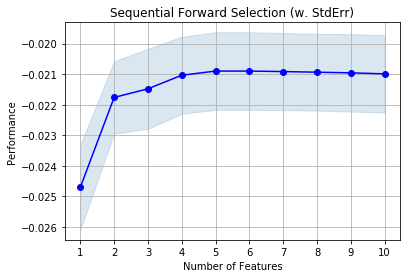

In [21]:
lr = LinearRegression()

sfs = SFS(lr, 
          k_features=10, # k_features has to be smaller or equal to the number of features. If equal to, it starts from
                         # intercept to the full model
          forward=True,  # forward
          floating=False, 
          scoring='neg_mean_squared_error',
          cv=10)

sfs = sfs.fit(X, y)
fig = plot_sfs(sfs.get_metric_dict(), kind='std_err')

plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

From the above plot, we can see that five features give the best performance, which agrees with our inital choice for 5 feature selection.

In [22]:
sfs.get_metric_dict()[5]

{'feature_idx': (0, 4, 6, 7, 9),
 'cv_scores': array([-0.02437963, -0.02178647, -0.02972474, -0.02215807, -0.01996505,
        -0.01718149, -0.01939251, -0.01520654, -0.01938409, -0.01981655]),
 'avg_score': -0.020899513204470133,
 'feature_names': ('TotalPctDiv',
  'PctIlleg',
  'racePctWhite',
  'PctFam2Par',
  'PctKids2Par'),
 'ci_bound': 0.002830249203206765,
 'std_dev': 0.003810690524126233,
 'std_err': 0.0012702301747087444}

Best model for five features in forward method, they are 'TotalPctDiv','PctIlleg','racePctWhite','PctFam2Par','PctKids2Par'.

Compared to backward method:'TotalPctDiv','racePctWhite', 'PctFam2Par', 'PctIlleg', 'PctKids2Par'. They are exactly the same.

#### LASSO

In [23]:
# LASSO
from sklearn import linear_model

alpha = 0.005 # Increasing alpha can shrink more variable coefficients to 0
clf = linear_model.Lasso(alpha=alpha)
clf.fit(X, y)

print(clf.coef_)
print(clf.intercept_)



[ 0.0559378   0.          0.          0.          0.17830971 -0.
 -0.21161607 -0.          0.05311741 -0.27929985]
0.4853226240605603


If we adjusted the alpha value to shrink 5 features to zero, we get the different result(than backward and forward selection) that 'TotalPctDiv','PctIlleg','PctYoungKids2Par','PctFam2Par','PctKids2Par' have non-zero coefficient.

#### Ridge

In [24]:
clf = linear_model.Ridge(alpha=alpha)
clf.fit(X, y)

print(clf.coef_)

print(clf.intercept_)

import numpy as np
# Increasing alpha can compress the L2 norm of the coefficients to 0 (but not selecting variables)
print("Sum of square of coefficients = %.2f"%np.sum(clf.coef_**2)) 

[ 0.37540493 -0.16768919  0.01267339 -0.04206349  0.15520419  0.04727144
 -0.23533446  0.35978387  0.15520419 -0.61530307]
0.36819369070600017
Sum of square of coefficients = 0.78


We can see that Ridge method doesn't shrink coefficient to zero, suggesting all features are kept

#### Let's do the simple linear regression performace comparison to see how feature engineering works.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
clf = linear_model.Lasso(alpha=alpha).fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('r2 for Lasso: %.3f'%r2_score(y_test, y_pred))

r2 for Lasso: 0.612


In [26]:
ridge = linear_model.Ridge(alpha=alpha).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('r2 for ridge: %.3f'%r2_score(y_test, y_pred))

r2 for ridge: 0.634


In [27]:
LR = linear_model.LinearRegression().fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('r2 for Linear regression: %.3f'%r2_score(y_test, y_pred))

r2 for Linear regression: 0.634


#### Then test five features selected from filter-based, backward and foward selection.

In [28]:
X= df[[ 'TotalPctDiv','PctIlleg','racePctWhite','PctFam2Par','PctKids2Par']]
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state = 0)
LR = linear_model.LinearRegression().fit(X_train, y_train)
y_pred = LR.predict(X_test)
print('r2 for Linear regression: %.3f'%r2_score(y_test, y_pred))

r2 for Linear regression: 0.636


#### Summary
We can see that r2 score is highest for the five features selected using the filter-based, backward and foward selection. Its performance is better than simple linear regression taking all 10 features, ridge regression, and Lasso regression with five features (different from the the five chose from filter-based, backward and foward selection).

Also, we noticed that Lasso regression has the worst performance, suggesting parameter tuning is required. It might not be as simple as choosing five features. 